In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
gdf = gpd.read_file('Washington_State_Legislative_Districts_2022.geojson')
gdf.head()

,FID,ID,DISTRICT,DISTRICTN,Shape_Leng,Shape_Le_1,Shape_Area,Shape__Area,Shape__Length,geometry
0,1,1,1,1,0.972558,2.888039e+05,1.508509e+09,3.099924e+08,130939.039976,"POLYGON ((-122.26796 47.71226, -122.26915 47.7..."
1,2,2,2,2,4.162767,1.177644e+06,2.447409e+10,4.869923e+09,525359.606304,"POLYGON ((-122.31254 46.79597, -122.31241 46.7..."
2,3,3,3,3,0.774628,2.269569e+05,1.152137e+09,2.357208e+08,102664.565812,"POLYGON ((-117.40012 47.58679, -117.40094 47.5..."
3,4,4,4,4,1.937361,5.943962e+05,1.111762e+10,2.290867e+09,269684.718861,"POLYGON ((-117.27881 47.60939, -117.27758 47.6..."
4,5,5,5,5,2.797009,7.926247e+05,1.244151e+10,2.521040e+09,356781.888324,"POLYGON ((-121.94649 47.22074, -121.94777 47.2..."


In [8]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


In [26]:
by_district = df.groupby('Legislative District').agg('count').reset_index()[['County']]
by_district.head()

,County
0,6614
1,1680
2,748
3,1228
4,6493


In [43]:
joined = pd.concat([gdf, by_district], axis=1)
joined.head()

,FID,ID,DISTRICT,DISTRICTN,Shape_Leng,Shape_Le_1,Shape_Area,Shape__Area,Shape__Length,geometry,County
0,1,1,1,1,0.972558,2.888039e+05,1.508509e+09,3.099924e+08,130939.039976,"POLYGON ((-122.26796 47.71226, -122.26915 47.7...",6614
1,2,2,2,2,4.162767,1.177644e+06,2.447409e+10,4.869923e+09,525359.606304,"POLYGON ((-122.31254 46.79597, -122.31241 46.7...",1680
2,3,3,3,3,0.774628,2.269569e+05,1.152137e+09,2.357208e+08,102664.565812,"POLYGON ((-117.40012 47.58679, -117.40094 47.5...",748
3,4,4,4,4,1.937361,5.943962e+05,1.111762e+10,2.290867e+09,269684.718861,"POLYGON ((-117.27881 47.60939, -117.27758 47.6...",1228
4,5,5,5,5,2.797009,7.926247e+05,1.244151e+10,2.521040e+09,356781.888324,"POLYGON ((-121.94649 47.22074, -121.94777 47.2...",6493


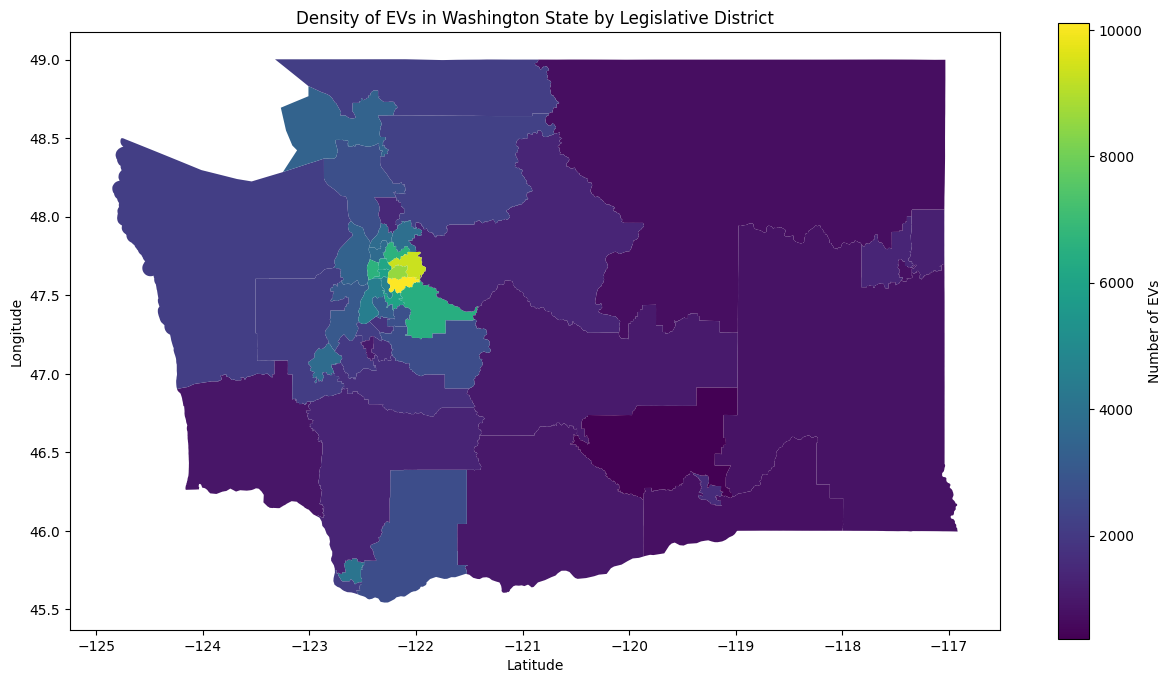

<Figure size 640x480 with 0 Axes>

In [42]:
joined.plot(column='County', legend=True, legend_kwds={'label': "Number of EVs"}, figsize=(15,8))
plt.title(label='Density of EVs in Washington State by Legislative District')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.savefig('EVs_by_District')